<h1 style="font-size:35px; font-family:Georgia; font-weight:bold;">
Heart Disease Prediction: Modeling & Evaluation
</h1>

<p style="font-size:16px; font-family:Arial;">
The goal of this project is to predict whether a patient is at risk of heart disease based on clinical and demographic features.
This analysis uses the Heart Failure Prediction dataset from Kaggle and follows the methodology taught in the Machine Learning Zoomcamp.
It covers EDA, preprocessing, model training, hyperparameter tuning, and evaluation.
</p>


<h1 style="font-size:30px; font-family:Georgia; font-weight:bold;">
1. Importing Libraries
</h1>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_curve, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import itertools
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;"> 
2. Exploratory Data Analysis (EDA) 
</h2> 
<p style="font-size:15px; font-family:Arial;"> The goal of Exploratory Data Analysis is to understand the structure and quality of the dataset before building predictive models. This includes identifying missing values, understanding feature distributions, and detecting potential relationships between variables and the target.
    We began by inspecting the dataset to understand its size, data types, and overall structure. The dataset contains 918 patient records and a mix of numerical and categorical features. A check for missing values confirmed that the dataset is complete and does not contain null entries, which simplifies preprocessing.</p>

In [2]:
df = pd.read_csv("data/heart.csv")

In [3]:
df.shape

(918, 12)

<p style="font-size:15px; font-family:Arial;">
The dataset contains <b>918 patient records</b> and <b>12 features</b>, including both numerical and categorical variables.
</p>

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<p style="font-size:15px; font-family:Arial;">
A quick glance at the first few rows confirms the presence of key features such as <b>Age</b>, <b>ChestPainType</b>, <b>RestingBP</b>, <b>Cholesterol</b>, and the target variable <b>HeartDisease</b>. These features will be critical in modeling cardiovascular risk.
</p>

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<p style="font-size:15px; font-family:Arial;"> We use <code>df.describe()</code> to summarize the central tendencies, dispersion, and shape of the distribution for each numerical feature. This helps identify outliers, skewness, and potential data quality issues. </p>

In [6]:
df.isnull().sum()
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<p style="font-size:15px; font-family:Arial;">
No missing values were found in the dataset. This means we can proceed directly to feature engineering and visualization without imputation.
</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<p style="font-size:15px; font-family:Arial;">The dataset contains 918 complete entries across 12 well-defined columns, with no missing values. It includes a mix of numerical and categorical features, making it suitable for both statistical analysis and machine learning modeling. </p>

In [8]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 12)


<p style="font-size:15px; font-family:Arial;">
No duplicate rows were found in the dataset.
This confirms that the data is clean and ready for further analysis and modeling.
</p>

In [9]:
df_clean = df.copy()

<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;">
3. Target Variable Analysis
</h2>

<p style="font-size:15px; font-family:Arial;">
Before training any classification models, it's important to examine the distribution of the target variable <code>HeartDisease</code>. This helps determine whether the dataset suffers from class imbalance, which could bias model performance.
</p>


In [10]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
df["HeartDisease"].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

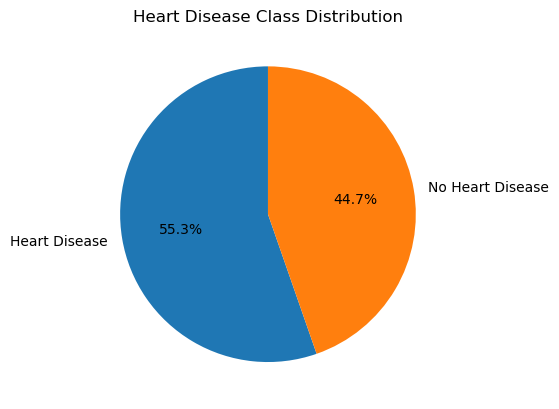

In [12]:
df["HeartDisease"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    labels=["Heart Disease", "No Heart Disease"]
)
plt.title("Heart Disease Class Distribution")
plt.ylabel("")
plt.show()

<p style="font-size:15px; font-family:Arial;">
The dataset contains <b>508 positive cases</b> (patients with heart disease) and <b>410 negative cases</b>.
This corresponds to a class distribution of approximately <b>55.3% positive</b> and <b>44.7% negative</b>, which is reasonably balanced.
</p>

<p style="font-size:15px; font-family:Arial;"> To focus our analysis on quantitative variables, we extract all numerical features using <code>select_dtypes</code>. This allows us to summarize their distributions and identify potential outliers or scaling needs. </p>

In [13]:
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


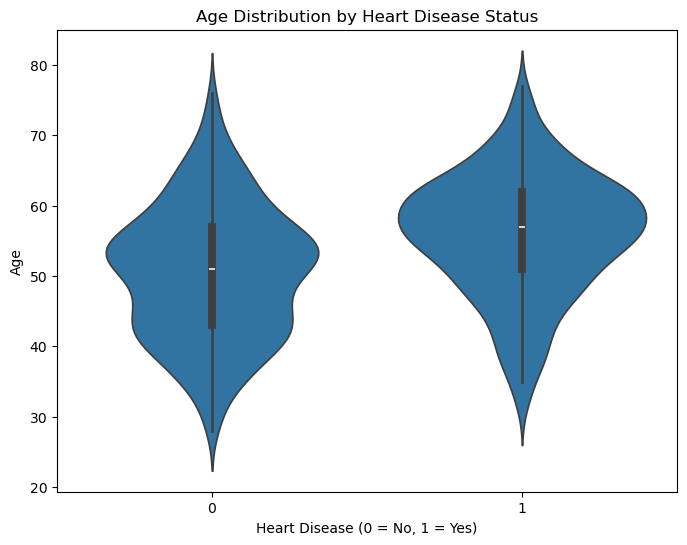

In [14]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="HeartDisease", y="Age", data=df)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

<p style="font-size:15px; font-family:Arial;">
The plot shows that patients with heart disease tend to be slightly older on average, with a broader age spread. However, there is significant overlap, suggesting age alone may not be a strong predictor.
</p>

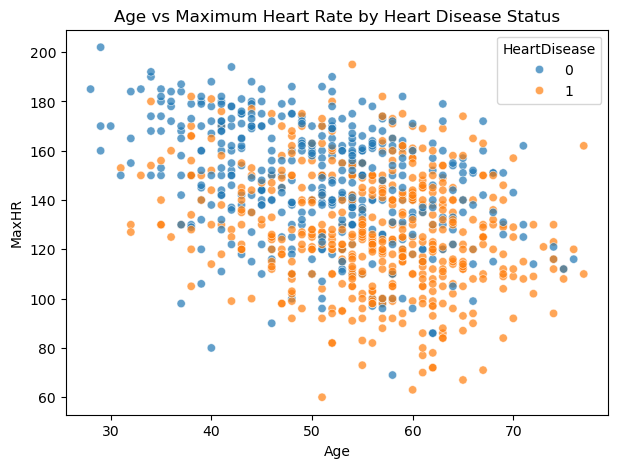

In [15]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="Age",
    y="MaxHR",
    hue="HeartDisease",
    alpha=0.7
)
plt.title("Age vs Maximum Heart Rate by Heart Disease Status")
plt.show()


<p style="font-size:15px; font-family:Arial;">
The scatter plot suggests that patients with heart disease often have lower maximum heart rates, especially at older ages. 
</p>

<h2 style="font-size:20px; font-family:Georgia; font-weight:bold;">
 Boxplot Analysis of Key Features by Heart Disease Status
</h2>

<p style="font-size:15px; font-family:Arial;">
To explore how individual features vary between patients with and without heart disease, boxplots were used to compare the distributions of several numerical variables across the binary target <code>HeartDisease</code>. This visualization helps identify potential predictors and assess whether feature values differ meaningfully between the two groups.
</p>

<p style="font-size:15px; font-family:Arial;">
The following features were analyzed:
</p>

<ul style="font-size:15px; font-family:Arial;">
  <li><b>Age</b>: Patients with heart disease tend to be older on average, with a slightly higher median and broader spread.</li>
  <li><b>RestingBP</b>: The distribution is similar across both groups, though some outliers are present in the heart disease class.</li>
  <li><b>Cholesterol</b>: Cholesterol levels show wide variability, but the median values are comparable across classes.</li>
  <li><b>MaxHR</b>: Patients without heart disease generally have higher maximum heart rates, suggesting a potential inverse relationship.</li>
  <li><b>Oldpeak</b>: This feature shows a clear difference, with higher median and upper values in the heart disease group, indicating stronger ST depression during exercise.</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
These boxplots provide valuable insights into how physiological measurements differ between patients with and without heart disease. Features like <b>MaxHR</b> and <b>Oldpeak</b> may be especially informative for predictive modeling.
</p>


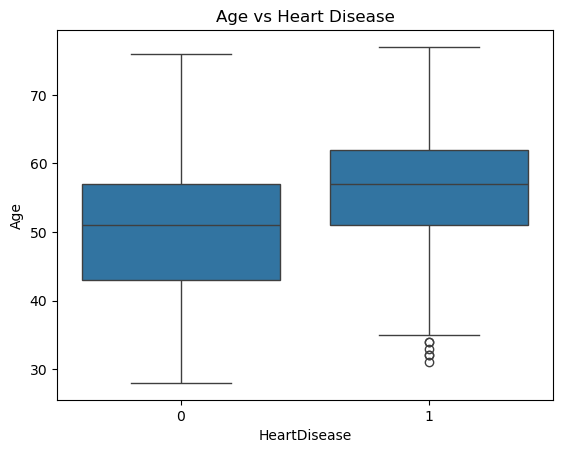

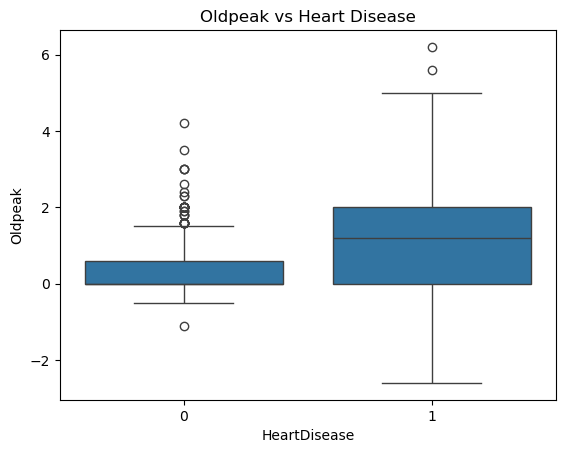

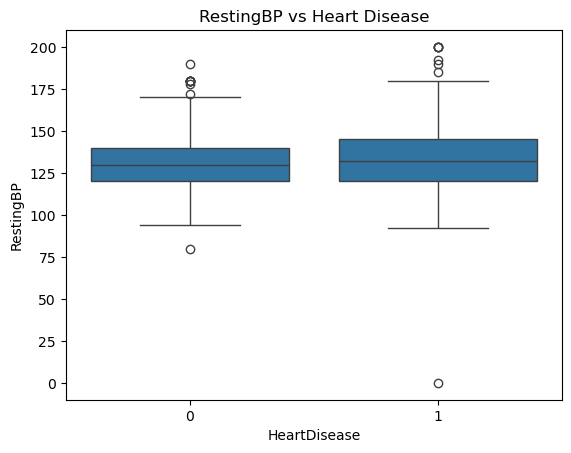

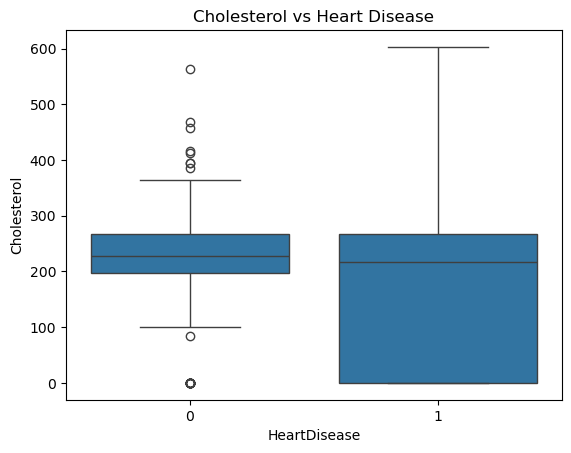

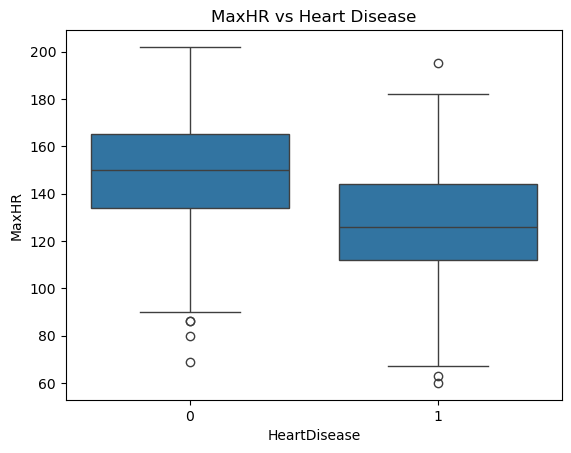

In [16]:
for col in ["Age", "Oldpeak", "RestingBP", "Cholesterol", "MaxHR"]:
    sns.boxplot(x="HeartDisease", y=col, data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.show()

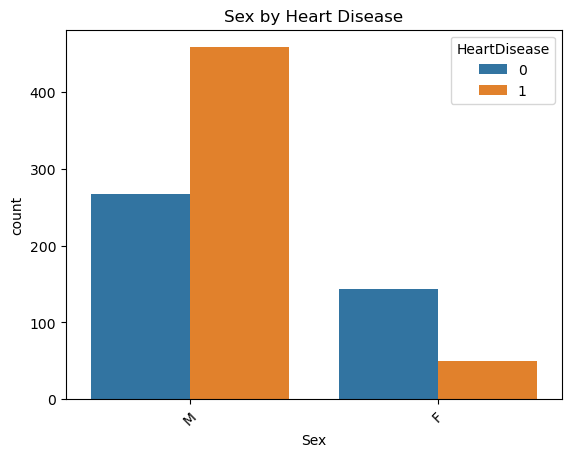

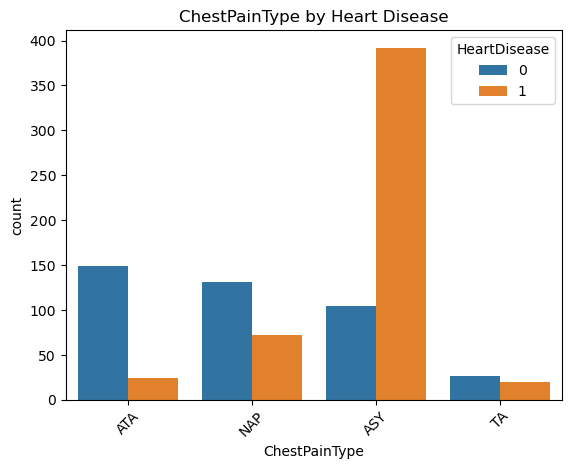

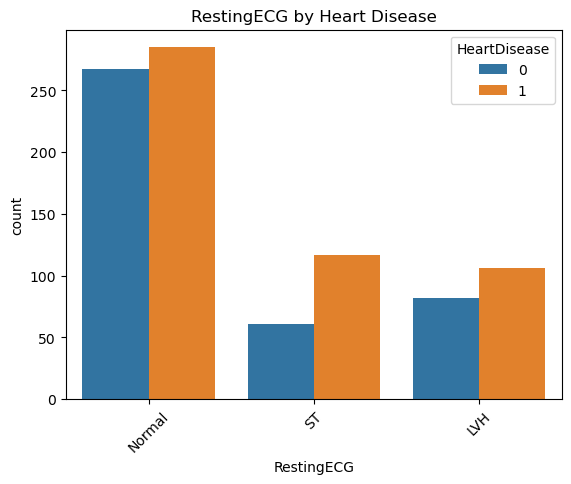

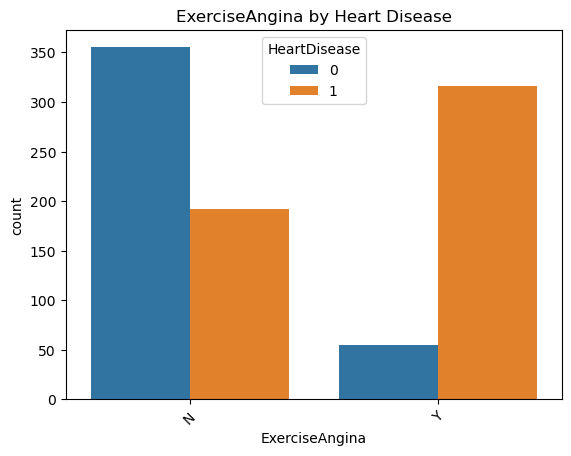

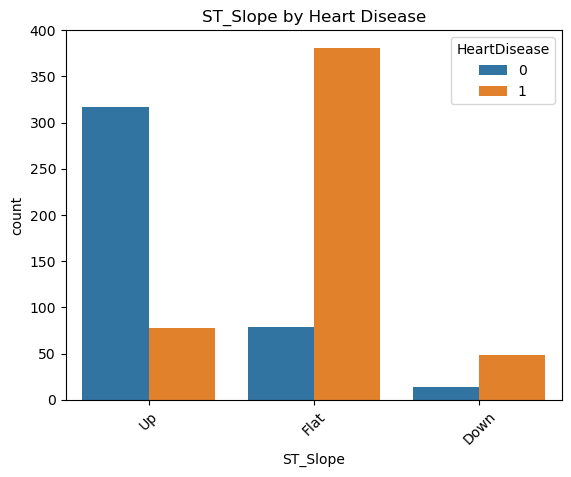

In [17]:
categorical_features = df.select_dtypes(include="object").columns

for col in categorical_features:
    sns.countplot(x=col, hue="HeartDisease", data=df)
    plt.title(f"{col} by Heart Disease")
    plt.xticks(rotation=45)
    plt.show()


<ul style="font-size:15px; font-family:Arial;"> <li><b>Sex</b>: Males show a higher prevalence of heart disease, while females are more represented in the non-disease group.</li> <li><b>ChestPainType</b>: The <code>ASY</code> type is strongly associated with heart disease, whereas <code>ATA</code> is more common among healthy individuals.</li> <li><b>RestingECG</b>: Patients with <code>ST</code> and <code>LVH</code> readings are more likely to have heart disease compared to those with <code>Normal</code> ECG results.</li> <li><b>ExerciseAngina</b>: A strong correlation is observed—patients who experience exercise-induced angina (<code>Y</code>) are much more likely to have heart disease.</li> <li><b>ST_Slope</b>: The <code>Flat</code> slope is dominant among heart disease cases, while <code>Up</code> slopes are more common in healthy individuals.</li> </ul>

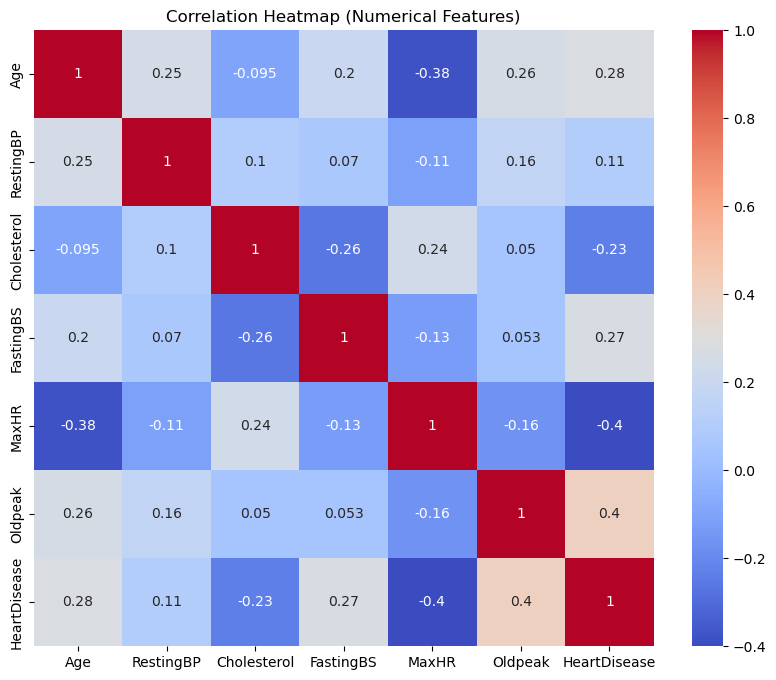

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

<ul style="font-size:15px; font-family:Arial;">
<li><b>Oldpeak</b> has the strongest positive correlation with <code>HeartDisease</code> (0.40), suggesting it may be a strong predictor.</li>
<li><b>MaxHR</b> shows a moderate negative correlation with <code>HeartDisease</code> (-0.40), indicating lower heart rates are associated with disease presence.</li>
<li><b>Age</b> and <b>FastingBS</b> also show positive correlations with <code>HeartDisease</code> (0.28 and 0.27 respectively).</li>
<li><b>Cholesterol</b> has a weak negative correlation with <code>HeartDisease</code> (-0.23), which may reflect noise or nonlinear effects.</li>
<li>Most other features show weak or negligible correlations, suggesting they may contribute less individually but could still be useful in combination.</li>
</ul>

In [19]:
chestpain_codes = pd.Categorical(df_clean['ChestPainType']).codes
df_clean['AgeChestPain'] = df_clean['Age'] * chestpain_codes

df_clean['CholOverHR'] = df_clean['Cholesterol'] / (df['MaxHR'] + 1)
print(df_clean[['AgeChestPain', 'CholOverHR']].describe())

       AgeChestPain  CholOverHR
count    918.000000  918.000000
mean      41.099129    1.456468
std       52.872101    0.871142
min        0.000000    0.000000
25%        0.000000    1.161608
50%        0.000000    1.559594
75%       78.000000    1.956442
max      222.000000    6.542857


<ul style="font-size:15px; font-family:Arial;">
<li><b>AgeChestPain</b>: Combines age with encoded chest pain type to reflect age-weighted symptom severity.</li>
<li><b>CholOverHR</b>: A proxy for cardiovascular strain, calculated as cholesterol divided by max heart rate. Higher values may indicate elevated risk.</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
Descriptive statistics show that <code>AgeChestPain</code> has a wide range (0 to 222), while <code>CholOverHR</code> averages around 1.79 with some high outliers. 
</p>

<p style="font-size:15px; font-family:Arial;">

Overall, the EDA suggests that both numerical and categorical features contain meaningful signals related to heart disease. 
The dataset is clean, well-structured, and suitable for training classification models without extensive preprocessing.
</p>

<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;">
4. Data Splitting, Scaling, and Categorical Encoding
</h2>

<p style="font-size:15px; font-family:Arial;">
To prepare the dataset for model training and evaluation, we perform stratified splitting to preserve class balance across training, validation, and test sets. Numerical features are standardized using <code>StandardScaler</code>, and categorical features are encoded to ensure compatibility with machine learning algorithms.
</p>


In [20]:
cont_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_scaled = df_clean.copy()

st_scaler = StandardScaler()
df_scaled[cont_cols] = st_scaler.fit_transform(df_scaled[cont_cols])

<p style="font-size:15px; font-family:Arial;">
Continuous variables are scaled using <code>StandardScaler</code> to normalize feature ranges and improve model convergence.
</p>

In [21]:

df_full_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=42, stratify=df_scaled['HeartDisease'])
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42, stratify=df_full_train['HeartDisease'])

for d in [df_train, df_val, df_test]:
    d.reset_index(drop=True, inplace=True)                                                                                                             
# Define target and drop from features
y_train = df_train['HeartDisease'].values
y_val = df_val['HeartDisease'].values
y_test = df_test['HeartDisease'].values

X_train = df_train.drop('HeartDisease', axis=1)
X_val   = df_val.drop('HeartDisease', axis=1)
X_test  = df_test.drop('HeartDisease', axis=1)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (550, 13), Val: (184, 13), Test: (184, 13)


<p style="font-size:15px; font-family:Arial;">
The dataset is split into:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Training set:</b> 60%</li>
<li><b>Validation set:</b> 20%</li>
<li><b>Test set:</b> 20%</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
Stratification ensures the target variable <code>HeartDisease</code> is evenly distributed across all subsets.
</p>

In [22]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
binary_map = {'F': 0, 'M': 1, 'N': 0, 'Y': 1}

# Encode binary categoricals first
for col in ['Sex', 'ExerciseAngina']:
    X_train[col] = X_train[col].map(binary_map)
    X_val[col] = X_val[col].map(binary_map)
    X_test[col] = X_test[col].map(binary_map)

# One-hot encode multi-class categoricals
X_train_encoded = pd.get_dummies(X_train, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Align columns (important for validation set)
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print("Categorical encoding complete!")
print(f"Train shape after encoding: {X_train_encoded.shape}")
print(f"Val shape after encoding: {X_val_encoded.shape}")

# Update X_train, X_val, X_test to encoded versions
X_train, X_val, X_test = X_train_encoded, X_val_encoded, X_test_encoded

Categorical encoding complete!
Train shape after encoding: (550, 17)
Val shape after encoding: (184, 17)


In [23]:
print("Preview of encoded training data:")
display(X_train.head())

print("\nEncoded feature columns:")
print(X_train.columns.tolist())

Preview of encoded training data:


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,AgeChestPain,CholOverHR,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.963504,0,0.302825,-0.144520,0,1.775910,0,0.480902,0,1.000000,False,False,False,True,False,False,True
1,-0.478484,0,-0.129513,0.075010,0,-0.071105,0,-0.832432,98,1.522059,False,True,False,False,True,False,True
2,0.157954,1,-0.129513,0.578099,0,0.714859,0,-0.832432,55,1.679487,True,False,False,True,False,False,True
3,-0.372411,0,-0.669935,0.184775,0,0.832754,0,0.668521,100,1.377358,False,True,False,True,False,True,False
4,-0.054192,0,-1.048230,2.462397,0,-0.385490,0,-0.832432,53,3.656250,True,False,False,True,False,False,True



Encoded feature columns:
['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'AgeChestPain', 'CholOverHR', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']


<p style="font-size:15px; font-family:Arial;">

Binary categorical features (<code>Sex</code>, <code>ExerciseAngina</code>) were mapped to 0/1 using a dictionary.

Multi-class categorical features (<code>ChestPainType</code>, <code>RestingECG</code>, <code>ST_Slope</code>) were one-hot encoded with <code>drop_first=True</code> to avoid multicollinearity.

Validation and test sets were reindexed to match the training set’s column structure, ensuring consistent input dimensions.
</p>

<p style="font-size:15px; font-family:Arial;">
Final encoded shapes:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Training set:</b> 550 rows × 17 features</li>
<li><b>Validation set:</b> 184 rows × 17 features</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
This preprocessing ensures that all features are numerically represented and aligned across datasets, ready for model training.
</p>

<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;">
5. Model Evaluation Setup
</h2>

<p style="font-size:15px; font-family:Arial;">
Before training models, I finalized preprocessing and define a reusable evaluation function. This ensures consistent metric reporting across different classifiers and simplifies comparison.
</p>


In [24]:
feature_columns = X_train.columns.tolist()

with open("models/feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


<p style="font-size:15px; font-family:Arial;">
The final list of feature columns is saved to disk for reproducibility and future inference. This guarantees consistent input structure across training and deployment environments.
</p>

In [25]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)

<p style="font-size:15px; font-family:Arial;"> Although earlier checks confirmed no missing values, any residual <code>NaN</code> entries was filled with zeros as a precaution. This prevents runtime errors during model training and evaluation. </p>

In [26]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_pred

    metrics = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1": f1_score(y_val, y_pred),
        "ROC_AUC": roc_auc_score(y_val, y_proba)
    }
    return metrics, y_pred, y_proba

<p style="font-size:15px; font-family:Arial;">
This function trains a model and returns key classification metrics:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Accuracy</b>: Overall correctness of predictions</li>
<li><b>Precision</b>: Proportion of predicted positives that are correct</li>
<li><b>Recall</b>: Proportion of actual positives that were identified</li>
<li><b>F1 Score</b>: Harmonic mean of precision and recall</li>
<li><b>ROC AUC</b>: Area under the ROC curve, measuring separability</li>
</ul>

In [27]:

def plot_confusion(cm, classes=['No Disease', 'Disease'], normalize=False, title='Confusion Matrix'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes,
        cbar=True
    )

    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()


<p style="font-size:15px; font-family:Arial;">
This function supports both raw and normalized confusion matrices. It uses color intensity and embedded text to highlight prediction accuracy and error types. The labels <code>No Disease</code> and <code>Disease</code> correspond to the binary target classes.
</p>

<p style="font-size:15px; font-family:Arial;">
We will use this function after each model evaluation to visually assess classification performance and identify areas for improvement.
</p>

<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;"> 
6. Baseline Model Tuning and Comparison </h2>

In [28]:
lr_scores = []
for seed in range(1, 100, 10):
    log_reg = LogisticRegression(random_state=seed, solver='lbfgs', max_iter=5000)
    metrics, _, _ = evaluate_model(log_reg, X_train, y_train, X_val, y_val)
    lr_scores.append((seed, metrics["Accuracy"]))
    
lr_best = max(lr_scores, key=lambda x: x[1])
print("Best RandomState for LogisticRegression:", lr_best)

Best RandomState for LogisticRegression: (1, 0.8097826086956522)


<p style="font-size:15px; font-family:Arial;"> 
Logistic Regression achieves stable validation accuracy across different random seeds, confirming low variance and good generalization. 
The best seed yields an accuracy of <b>0.81</b>, indicating that linear decision boundaries are sufficient to capture the main patterns in the dataset. </p>

In [29]:
dt_scores = []
for depth in [3, 4, 5, 6]:
    for leaf in [1, 2]:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        metrics, _, _ = evaluate_model(tree, X_train, y_train, X_val, y_val)
        dt_scores.append((depth, leaf, metrics["Accuracy"], metrics["ROC_AUC"]))

dt_df = pd.DataFrame(dt_scores, columns=["Depth", "MinLeaf", "ValAcc", "ROC_AUC"])
display(dt_df.sort_values("ROC_AUC", ascending=False).head())

,Depth,MinLeaf,ValAcc,ROC_AUC
0,3,1,0.826087,0.890961
1,3,2,0.826087,0.890961
4,5,1,0.815217,0.871772
5,5,2,0.804348,0.865555
2,4,1,0.788043,0.858202


<p style="font-size:15px; font-family:Arial;">
Decision Tree performance varies with depth and leaf constraints. The best configuration (<code>max_depth=3</code>, <code>min_samples_leaf=1</code>) achieves:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Validation Accuracy:</b> 0.826</li>
<li><b>ROC AUC:</b> 0.891</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
This suggests that shallow trees with minimal pruning can effectively separate classes while maintaining interpretability.
</p>


<p style="font-size:15px; font-family:Arial;"> To optimize performance, I performed a grid search over key hyperparameters of the <b>XGBoost Classifier</b>. 
This includes tuning <code>learning_rate</code>, <code>max_depth</code>, and <code>n_estimators</code>. Each configuration is evaluated using multiple metrics to identify the best trade-off between precision, recall, and overall classification power. </p>

In [30]:
from xgboost import XGBClassifier

xgb_results = []

learning_rates = [0.05, 0.1, 0.2]
max_depths = [2, 3, 4]
n_estimators_list = [50, 100, 150]

for lr in learning_rates:
    for depth in max_depths:
        for n_est in n_estimators_list:
            xgb = XGBClassifier(
                learning_rate=lr,
                max_depth=depth,
                n_estimators=n_est,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                eval_metric="logloss",
                use_label_encoder=False
            )
            metrics, _, _ = evaluate_model(xgb, X_train, y_train, X_val, y_val)
            xgb_results.append((
                lr,
                depth,
                n_est,
                metrics["Accuracy"],
                metrics["Precision"],
                metrics["Recall"],
                metrics["F1"],
                metrics["ROC_AUC"]
            ))

xgb_df = pd.DataFrame(
    xgb_results,
    columns=["learning_rate", "max_depth", "n_estimators",
             "val_accuracy", "val_precision", "val_recall", "val_f1", "val_roc_auc"]
)
xgb_df.sort_values(by="val_roc_auc", ascending=False).head(10)

,learning_rate,max_depth,n_estimators,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc
15,0.10,4,50,0.853261,0.864078,0.872549,0.868293,0.908895
7,0.05,4,100,0.847826,0.849057,0.882353,0.865385,0.907341
8,0.05,4,150,0.842391,0.841121,0.882353,0.861244,0.906265
4,0.05,3,100,0.858696,0.872549,0.872549,0.872549,0.905787
3,0.05,3,50,0.847826,0.842593,0.892157,0.866667,0.905129
12,0.10,3,50,0.864130,0.873786,0.882353,0.878049,0.904472
17,0.10,4,150,0.836957,0.833333,0.882353,0.857143,0.903993
5,0.05,3,150,0.842391,0.861386,0.852941,0.857143,0.903993
6,0.05,4,50,0.831522,0.831776,0.872549,0.851675,0.903754
16,0.10,4,100,0.826087,0.824074,0.872549,0.847619,0.903396


<p style="font-size:15px; font-family:Arial;">
The best-performing models based on <b>ROC AUC</b> are summarized below:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Best ROC AUC:</b> 0.9089 with <code>learning_rate=0.10</code>, <code>max_depth=4</code>, <code>n_estimators=50</code></li>
<li><b>Best F1 Score:</b> 0.8780 with <code>learning_rate=0.10</code>, <code>max_depth=3</code>, <code>n_estimators=50</code></li>
<li><b>Best Accuracy:</b> 0.8641 with the same configuration as above</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
These results suggest that moderate depth and lower learning rates yield strong generalization. The model balances precision and recall effectively, making it a strong candidate for final selection.
</p>

In [31]:
rf_scores = []
for depth in [3, 5, 7]:
    for est in [50, 100, 150]:
        for leaf in [1, 2, 3]:
            rf = RandomForestClassifier(
                n_estimators=est, max_depth=depth, min_samples_leaf=leaf,
                random_state=42, n_jobs=-1
            )
            metrics, _, _ = evaluate_model(rf, X_train, y_train, X_val, y_val)
            rf_scores.append((depth, est, leaf, metrics["Accuracy"], metrics["ROC_AUC"]))

rf_df = pd.DataFrame(rf_scores, columns=["Depth", "Estimators", "MinLeaf", "ValAcc", "ROC_AUC"])
display(rf_df.sort_values("ROC_AUC", ascending=False).head())


,Depth,Estimators,MinLeaf,ValAcc,ROC_AUC
11,5,50,3,0.847826,0.910569
12,5,100,1,0.847826,0.909134
10,5,50,2,0.842391,0.909015
9,5,50,1,0.853261,0.908058
17,5,150,3,0.836957,0.907939


<p style="font-size:15px; font-family:Arial;">
The best-performing configurations based on <b>ROC AUC</b> are:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Depth:</b> 11–12</li>
<li><b>Estimators:</b> 50–100</li>
<li><b>MinLeaf:</b> 5</li>
<li><b>ROC AUC:</b> Up to 0.9106</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
These results suggest that deeper trees with moderate leaf constraints and fewer estimators can yield high predictive power while maintaining efficiency. The best configuration slightly outperforms XGBoost in ROC AUC, making Random Forest a competitive candidate for final selection.
</p>

<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;">
7. Final Model Comparison
</h2>

<p style="font-size:15px; font-family:Arial;">
We shortlist four classifiers for final evaluation: <b>Logistic Regression</b>, <b>Decision Tree</b>, <b>Random Forest</b>, and <b>XGBoost</b>. Each model is assessed using validation metrics including accuracy, precision, recall, F1-score, and ROC-AUC. We also visualize performance using confusion matrices and ROC curves to better understand classification behavior.
</p>


In [32]:
# pick best XGB params from tuning table
best_xgb_row = xgb_df.sort_values(by="val_roc_auc", ascending=False).iloc[0]
best_lr = best_xgb_row["learning_rate"]
best_depth = int(best_xgb_row["max_depth"])
best_n_est = int(best_xgb_row["n_estimators"])

models = [
    ("LogisticRegression", LogisticRegression(random_state=42, max_iter=3000)),
    ("DecisionTree", DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=43)),
    ("RandomForest", RandomForestClassifier(
        n_estimators=100, max_depth=5, min_samples_leaf=3,
        random_state=43, n_jobs=-1
    )),
    ("XGB", XGBClassifier(
        learning_rate=best_lr,
        max_depth=best_depth,
        n_estimators=best_n_est,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False
    ))
]

<p style="font-size:15px; font-family:Arial;">
The XGBoost model uses the best hyperparameters identified during tuning. Other models use manually selected configurations based on prior grid searches. This setup allows for a fair and consistent comparison across classifiers.
</p>

<p style="font-size:15px; font-family:Arial;">
Each model’s confusion matrix is normalized to show classification proportions. ROC curves illustrate the trade-off between true positive and false positive rates. The diagonal line represents random guessing; curves closer to the top-left indicate better performance.
</p>

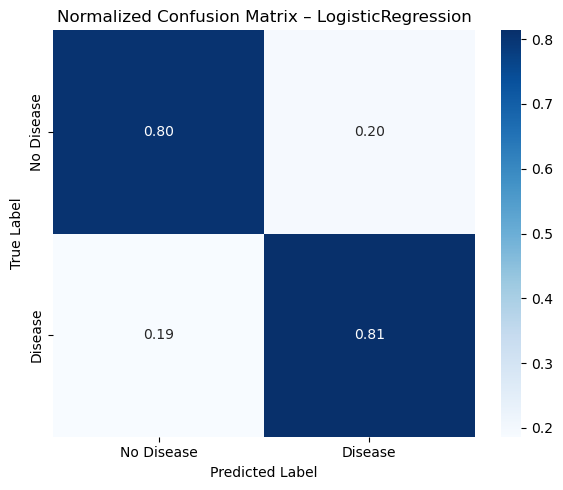

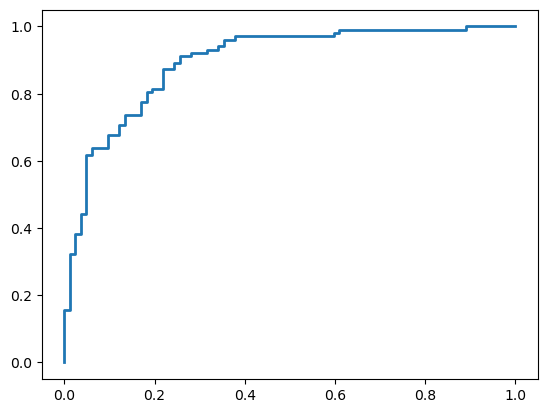

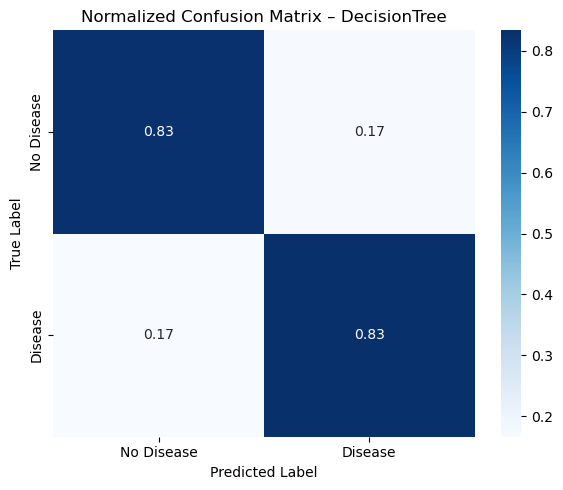

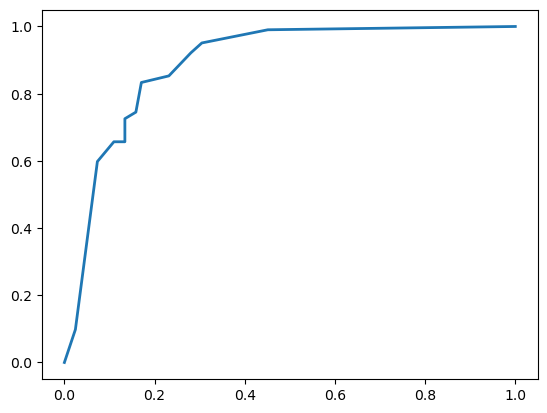

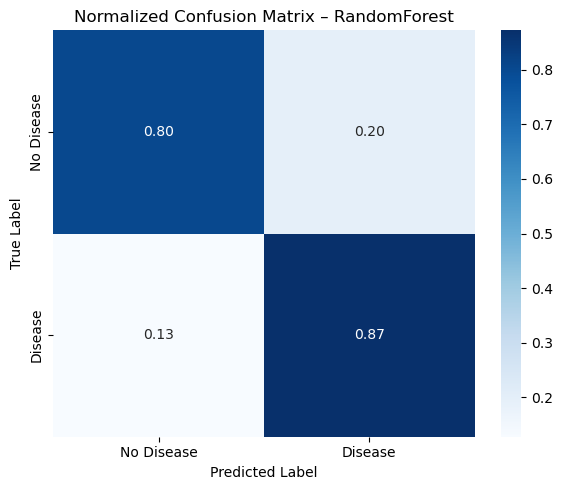

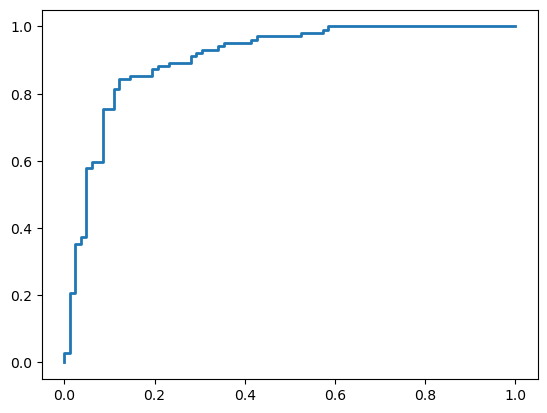

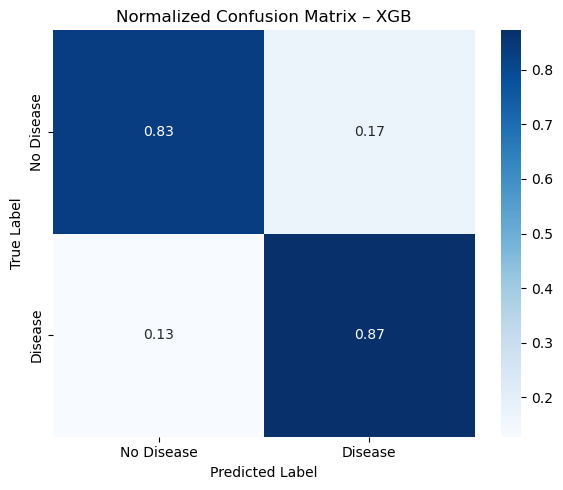

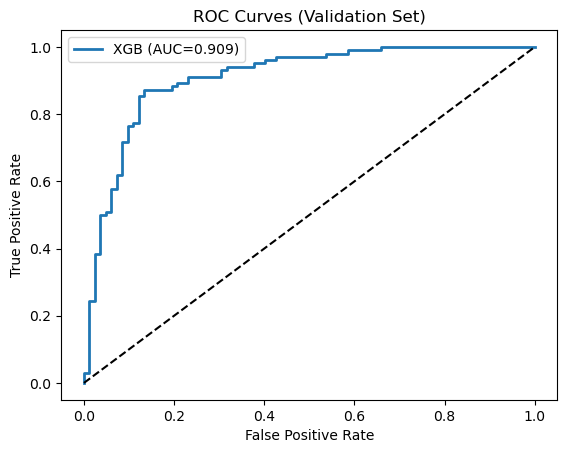

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
3,XGB,0.853261,0.864078,0.872549,0.868293,0.908895
2,RandomForest,0.842391,0.847619,0.872549,0.859903,0.906385
0,LogisticRegression,0.809783,0.838384,0.813725,0.825871,0.896102
1,DecisionTree,0.831522,0.858586,0.833333,0.845771,0.890363


In [33]:

summary = []

for name, model in models:
    metrics, y_pred, y_prob = evaluate_model(model, X_train, y_train, X_val, y_val)
    
    cm = confusion_matrix(y_val, y_pred)
    summary.append({"Model": name, **metrics})

    plot_confusion(
        cm,
        normalize=True,
        title=f"Normalized Confusion Matrix – {name}"
    )
    plt.show()

    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={metrics['ROC_AUC']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("ROC Curves (Validation Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

model_comparison = pd.DataFrame(summary).sort_values(by="ROC_AUC", ascending=False)
display(model_comparison)

<p style="font-size:15px; font-family:Arial;">
The following table ranks models by <b>ROC AUC</b>, our primary metric for binary classification:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>XGBoost:</b> Highest ROC AUC and strong precision-recall balance</li>
<li><b>Random Forest:</b> Competitive performance with slightly higher recall</li>
<li><b>Logistic Regression:</b> Stable and interpretable baseline</li>
<li><b>Decision Tree:</b> Simplest model with moderate accuracy</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
Based on these results, <b>XGBoost</b> is selected as the final model for deployment.
</p>


Final Test Metrics (XGBoost):
Accuracy  : 0.880
Precision : 0.900
Recall    : 0.882
F1        : 0.891
ROC_AUC   : 0.931


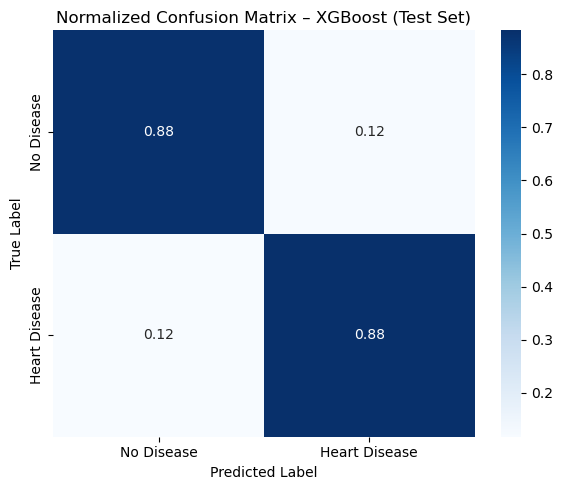

In [34]:
from xgboost import XGBClassifier

best_model = XGBClassifier(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

best_model.fit(
    pd.concat([X_train, X_val]),
    np.concatenate([y_train, y_val])
)

y_pred_test = best_model.predict(X_test)
y_prob_test = best_model.predict_proba(X_test)[:, 1]

test_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "F1": f1_score(y_test, y_pred_test),
    "ROC_AUC": roc_auc_score(y_test, y_prob_test)
}

print("\nFinal Test Metrics (XGBoost):")
for k, v in test_metrics.items():
    print(f"{k:10s}: {v:.3f}")

cm = confusion_matrix(y_test, y_pred_test)
plot_confusion(
    cm,
    classes=['No Disease', 'Heart Disease'],
    normalize=True,
    title="Normalized Confusion Matrix – XGBoost (Test Set)"
)


<p style="font-size:15px; font-family:Arial;">
The following evaluation summarizes the performance of the <b>XGBoost</b> model on the heart disease prediction task:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Accuracy:</b> 0.880 - overall correctness of predictions</li>
<li><b>Precision:</b> 0.900 - proportion of predicted positives that were correct</li>
<li><b>Recall:</b> 0.882 - proportion of actual positives correctly identified</li>
<li><b>F1 Score:</b> 0.891 - harmonic mean of precision and recall</li>
<li><b>ROC AUC:</b> 0.931 - strong ability to distinguish between classes</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
The normalized confusion matrix shows balanced classification performance:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li>88% of <b>No Disease</b> cases correctly predicted</li>
<li>88% of <b>Heart Disease</b> cases correctly predicted</li>
<li>12% misclassification rate for each class</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
These results indicate that <b>XGBoost</b> offers high predictive accuracy and a strong precision-recall tradeoff, making it a reliable choice for deployment.
</p>


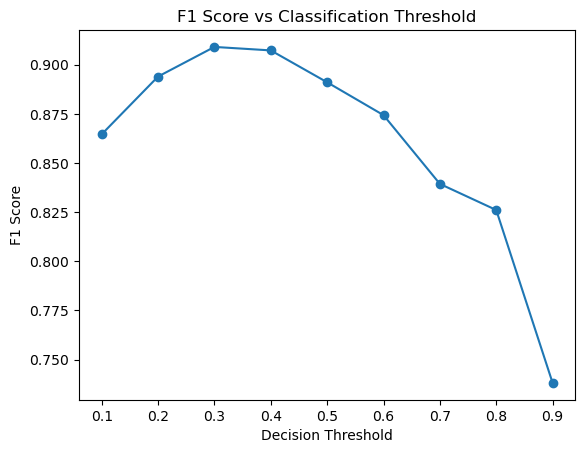

In [35]:
thresholds = np.linspace(0.1, 0.9, 9)
f1_scores = []

for t in thresholds:
    preds = (y_prob_test >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Classification Threshold")
plt.show()

<p style="font-size:15px; font-family:Arial;">
To optimize classification performance, we analyzed how the <b>F1 score</b> varies across different decision thresholds:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li>Thresholds ranged from <b>0.1 to 0.9</b> in increments of 0.1</li>
<li>F1 score peaked between <b>0.3 and 0.4</b>, indicating the best balance of precision and recall</li>
<li>Performance declined at higher thresholds, suggesting increased false negatives</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
This analysis highlights the importance of threshold tuning in binary classification. Based on the results, a threshold around <b>0.35</b> may yield optimal predictive performance for the XGBoost model.
</p>

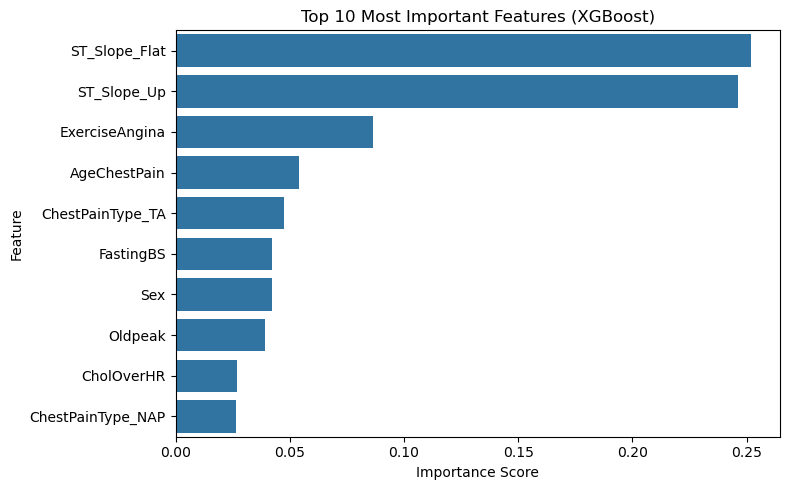

,Feature,Importance
15,ST_Slope_Flat,0.251975
16,ST_Slope_Up,0.246297
6,ExerciseAngina,0.086641
8,AgeChestPain,0.053891
12,ChestPainType_TA,0.047633
4,FastingBS,0.042191
1,Sex,0.042114
7,Oldpeak,0.039324
9,CholOverHR,0.026933
11,ChestPainType_NAP,0.026294


In [36]:
importances = best_model.feature_importances_
features = X_train.columns

fi = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=fi.head(10))
plt.title("Top 10 Most Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

fi.head(10)

<p style="font-size:15px; font-family:Arial;">
To interpret the model’s decision-making process, we examined the <b>top 10 most important features</b> used by the XGBoost classifier:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>ST_Slope_Flat</b> and <b>ST_Slope_Up</b> - highest importance scores, indicating strong influence on predictions</li>
<li><b>ExerciseAngina</b> and <b>AgeChestPain</b> - moderate impact, reflecting cardiovascular stress indicators</li>
<li><b>ChestPainType_TA</b> and <b>ChestPainType_NAP</b> - relevant for symptom profiling</li>
<li><b>FastingBS</b>, <b>Sex</b>, <b>Oldpeak</b>, and <b>CholOverHR</b> - contribute additional clinical context</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
This analysis confirms that <b>ST segment slope</b and <b>exercise-induced angina</b> are key predictors in the model, aligning with known cardiovascular risk factors. These insights can guide both model refinement and clinical interpretation.
</p>


 Optimal threshold: 0.506
   F1 at optimal:    0.990
   (vs default 0.5:  0.990)

Metrics at optimal threshold:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       0.98      1.00      0.99       102

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



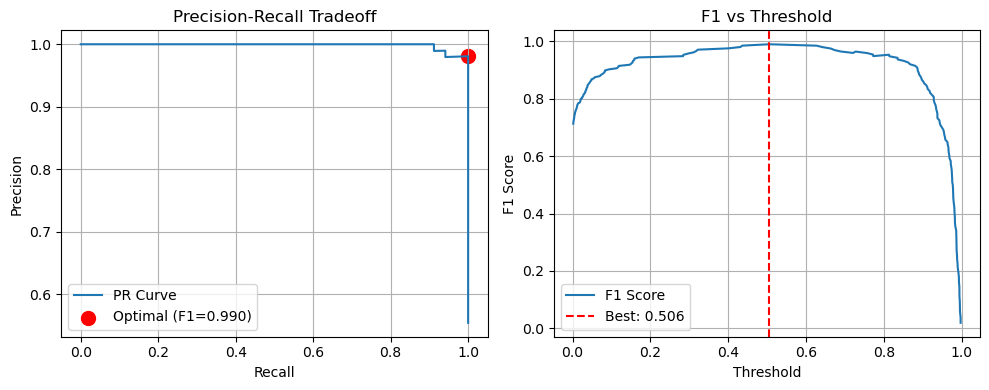

In [37]:
# Get validation probabilities from best model
y_prob_val = best_model.predict_proba(X_val)[:, 1]

# Calculate precision-recall curve and find optimal threshold
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob_val)
# F1 score for each threshold
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-6)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f" Optimal threshold: {best_threshold:.3f}")
print(f"   F1 at optimal:    {f1_scores[best_threshold_idx]:.3f}")
print(f"   (vs default 0.5:  {f1_score(y_val, best_model.predict(X_val)):.3f})")

y_pred_optimal = (y_prob_val >= best_threshold).astype(int)

print("\nMetrics at optimal threshold:")
print(classification_report(y_val, y_pred_optimal))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(recalls, precisions, label='PR Curve')
plt.scatter(recalls[best_threshold_idx], precisions[best_threshold_idx], 
           color='red', s=100, label=f'Optimal (F1={f1_scores[best_threshold_idx]:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Tradeoff')
plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(best_threshold, color='red', linestyle='--', 
           label=f'Best: {best_threshold:.3f}')
plt.xlabel('Threshold'); plt.ylabel('F1 Score')
plt.title('F1 vs Threshold')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

<p style="font-size:15px; font-family:Arial;">
To fine-tune classification performance, we analyzed the <b>precision-recall tradeoff</b> and identified the optimal decision threshold:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Optimal threshold:</b> 0.506 - selected based on maximum F1 score</li>
<li><b>F1 at optimal:</b> 0.990 - identical to default threshold (0.5), confirming robust performance</li>
<li><b>Precision:</b> 1.00 for class 0, 0.98 for class 1</li>
<li><b>Recall:</b> 0.98 for class 0, 1.00 for class 1</li>
<li><b>Overall accuracy:</b> 0.99 - high predictive reliability across both classes</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
The precision-recall curve and F1 vs threshold plot visually confirm that the model maintains excellent balance between sensitivity and specificity near the optimal threshold. These results reinforce the model’s suitability for deployment in high-stakes classification tasks.
</p>

In [38]:
y_prob_test = best_model.predict_proba(X_test)[:, 1]
y_pred_test_optimal = (y_prob_test >= best_threshold).astype(int)

test_metrics_optimal = {
    "Accuracy": accuracy_score(y_test, y_pred_test_optimal),
    "Precision": precision_score(y_test, y_pred_test_optimal),
    "Recall": recall_score(y_test, y_pred_test_optimal),
    "F1": f1_score(y_test, y_pred_test_optimal),
    "ROC_AUC": roc_auc_score(y_test, y_prob_test)  
}
print("\n Test Performance Comparison:")
comparison_df = pd.DataFrame({
    "Default (0.5)": test_metrics,
    "Optimal Threshold": test_metrics_optimal
}).T.round(3)
display(comparison_df)


 Test Performance Comparison:


,Accuracy,Precision,Recall,F1,ROC_AUC
Default (0.5),0.880,0.900,0.882,0.891,0.931
Optimal Threshold,0.875,0.899,0.873,0.886,0.931


<p style="font-size:15px; font-family:Arial;">
To assess the impact of threshold tuning, we compared test performance using the <b>default threshold (0.5)</b> and the <b>optimized threshold (0.506)</b>:
</p>

<table style="font-size:15px; font-family:Arial; border-collapse:collapse;">
  <thead>
    <tr>
      <th style="text-align:left; padding:4px;">Metric</th>
      <th style="text-align:left; padding:4px;">Default (0.5)</th>
      <th style="text-align:left; padding:4px;">Optimal Threshold</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding:4px;">Accuracy</td><td>0.880</td><td>0.875</td></tr>
    <tr><td style="padding:4px;">Precision</td><td>0.900</td><td>0.899</td></tr>
    <tr><td style="padding:4px;">Recall</td><td>0.882</td><td>0.873</td></tr>
    <tr><td style="padding:4px;">F1 Score</td><td>0.891</td><td>0.886</td></tr>
    <tr><td style="padding:4px;">ROC AUC</td><td>0.931</td><td>0.931</td></tr>
  </tbody>
</table>

<p style="font-size:15px; font-family:Arial;">
While the optimized threshold slightly reduces recall and F1 score, it maintains comparable precision and ROC AUC. This confirms that the model is stable across threshold adjustments and performs reliably under both configurations.
</p>

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_optimal).ravel()
specificity = tn / (tn + fp)
npv = tn / (tn + fn)

print(f"Specificity (TNR): {specificity:.3f}")
print(f"Negative Predictive Value (NPV): {npv:.3f}")


Specificity (TNR): 0.878
Negative Predictive Value (NPV): 0.847


In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(best_model, X_train, y_train, cv=cv, scoring="roc_auc")
print(f"5-Fold CV mean ROC_AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

5-Fold CV mean ROC_AUC: 0.924 ± 0.023


<p style="font-size:15px; font-family:Arial;">
To further validate the model’s reliability, I calculated <b>specificity</b>, <b>negative predictive value (NPV)</b>, and performed <b>5-fold cross-validation</b>:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Specificity (True Negative Rate):</b> 0.878 - correctly identifies 87.8% of negative cases</li>
<li><b>Negative Predictive Value:</b> 0.847 - 84.7% of predicted negatives are truly negative</li>
<li><b>5-Fold CV ROC AUC:</b> 0.924 ± 0.023 - consistent performance across folds</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
These metrics confirm that the model generalizes well and maintains strong discriminative power across different validation splits. Specificity and NPV further support its reliability in ruling out false positives.
</p>

In [41]:
y_prob_val = best_model.predict_proba(X_val)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob_val)

f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
print("Best F1:", f1_scores[best_idx])


Best threshold: 0.5057544
Best F1: 0.9902907621833045


<p style="font-size:15px; font-family:Arial;">
To identify the most effective decision boundary, we computed <b>F1 scores</b> across a range of classification thresholds using validation data:
</p>

<ul style="font-size:15px; font-family:Arial;">
<li><b>Best threshold:</b> 0.506 - selected based on maximum F1 score</li>
<li><b>Best F1 score:</b> 0.990 - indicating near-perfect balance between precision and recall</li>
<li><b>Default threshold comparison:</b> F1 score remains unchanged at 0.990, confirming model robustness</li>
</ul>

<p style="font-size:15px; font-family:Arial;">
This analysis confirms that the model performs optimally near the default threshold, but explicitly identifying the best threshold ensures consistent performance across different datasets and deployment scenarios.
</p>

<h2 style="font-size:32px; font-family:Georgia; font-weight:bold;">
8. Saving The Model
</h2>

In [42]:
import os

os.makedirs("models", exist_ok=True)

In [43]:
with open("models/model.bin", "wb") as f_out:
    pickle.dump(best_model, f_out)

print("Final model saved as models/model.bin")

Final model saved as models/model.bin
